In [1]:
import numpy as np
from sklearn.utils import shuffle
import torch
import xarray as xr
from scipy.signal import detrend
import netCDF4 as nc
import numpy as np


def make_anomaly_data(y_path):

    trY_SST_ds=nc.Dataset(y_path)
    trY_SST=trY_SST_ds.variables['sst'][:,:,:,:,:].data
    

    # trX_SST_ds=nc.Dataset("../Data/COBE_SST_resize.nc")
    # trX_SST= trX_SST_ds.variables['sst'][:-11]
    # trX_SST=trX_SST.filled(np.nan)


    trY_SST=trY_SST[:,21:-4,:,:]  #1871 - 2010
    trY_SST=np.nan_to_num(trY_SST)
    # trX_SST=np.nan_to_num(trX_SST)
    #plot_map(lon_sst,lat_sst,trY_SST.mean((0,1,2)),'trY.jpg')
    trY_SST_anom=trY_SST-np.expand_dims(trY_SST.mean(1),1)
    #trY_SST_detrended = detrend(trY_SST,axis=1) # Detrending trY_SST
    # trX_SST = trX_SST.reshape(174,12,48,144)
    # trX_SST_anom = trX_SST-trX_SST.mean(0)
    # trX_SST_anom = trX_SST_anom.reshape(2088,48,144)


    trY_SST=trY_SST_anom.reshape(trY_SST.shape[0],1680,48,144)#.reshape(16800,48,144)  # Anomaly Data
    # trX_SST=trX_SST_anom.reshape(1,2088,48,144)#.reshape(16800,48,144)


    trY_SST_train=trY_SST[:,:1428] #1871-1989
    trY_SST_test=trY_SST[0,1428:] #1990-2010


    # trX_SST_train=trX_SST[:,:1680,:,:]#1871-1989
    # trX_SST_test=trX_SST[:,1680:,:,:] #1990-2010
    return trY_SST_train,trY_SST_test#,trX_SST_train,trX_SST_test



In [2]:
import numpy as np
from sklearn.utils import shuffle
import torch
import xarray as xr
from scipy.signal import detrend
import netCDF4 as nc
import numpy as np


def make_full_data(y_path):
    #trY_SST_ds=nc.Dataset("../Data/CMIP6-SST/GISS-E2-1-H_historical_1850_2014.nc")
    trY_SST_ds=nc.Dataset(y_path)
    trY_SST=trY_SST_ds.variables['sst'][:,:,:,:,:].data
    

    # trX_SST_ds=nc.Dataset("../Data/COBE_SST_resize.nc")
    # trX_SST= trX_SST_ds.variables['sst'][:-11]
    # trX_SST=trX_SST.filled(np.nan)



    trY_SST=trY_SST[:,21:-4,:,:]  #1871 - 2010
    trY_SST=np.nan_to_num(trY_SST)
    # trX_SST=np.nan_to_num(trX_SST)
    #plot_map(lon_sst,lat_sst,trY_SST.mean((0,1,2)),'trY.jpg')
    trY_SST_anom=trY_SST-np.expand_dims(trY_SST.mean(1),1)
    #trY_SST_detrended = detrend(trY_SST,axis=1) # Detrending trY_SST
    # trX_SST = trX_SST.reshape(174,12,48,144)
    # trX_SST_anom = trX_SST-trX_SST.mean(0)
    # trX_SST_anom = trX_SST_anom.reshape(2088,48,144)


    trY_SST=trY_SST.reshape(trY_SST.shape[0],1680,48,144)#.reshape(16800,48,144)  # Anomaly Data
    # trX_SST=trX_SST.reshape(1,2088,48,144)#.reshape(16800,48,144)


    trY_SST_train=trY_SST[:,:1428] #1871-1989
    trY_SST_test=trY_SST[0,1428:] #1990-2010

    #trX_SST_train=np.repeat(np.expand_dims(trX_SST[:1560],0),trY_SST.shape[0],axis=0)
    # trX_SST_train=trX_SST[:,:1680,:,:]#1871-1989
    # trX_SST_test=trX_SST[:,1680:,:,:] #1990-2010
    return trY_SST_train,trY_SST_test#,trX_SST_train,trX_SST_test



In [4]:
trY_SST_train,trY_SST_test = make_anomaly_data("../Data/CMIP6-SST/GISS-E2-1-H_historical_1850_2014.nc")
X_train=trY_SST_train[:,:-1,:,:]#-np.expand_dims(trY_SST.mean(axis=1),1)
Y_train=trY_SST_train[:,1:,:,:]

X_train = X_train.reshape(X_train.shape[0]*X_train.shape[1],48,144)
Y_train = Y_train.reshape(Y_train.shape[0]*Y_train.shape[1],48,144)

X_test=trY_SST_test[:-1,:,:]
Y_test=trY_SST_test[1:,:,:]



In [5]:
trY_SST_ds=nc.Dataset("../Data/CMIP6-SST/GISS-E2-1-H_historical_1850_2014.nc")
mask=1-trY_SST_ds.variables['sst'][0,0,0,:,:].mask
lat_sst=trY_SST_ds.variables['lat'][:]
lon_sst=trY_SST_ds.variables['lon'][:]

In [5]:
#!pip install basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
def plot_map(lon,lat,data,file_name):
#     m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
#             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat_sst), urcrnrlat=np.max(lat_sst),
            llcrnrlon=np.min(lon_sst), urcrnrlon=np.max(lon_sst), )
    #m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    #m.drawcoastlines()
    levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    #levels = np.linspace(0.0,1.0,21)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='seismic')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1])
    #plt.title('sst')
    #cb.set_label('sst')

    plt.savefig(file_name)
    


    plt.show()
    plt.clf()



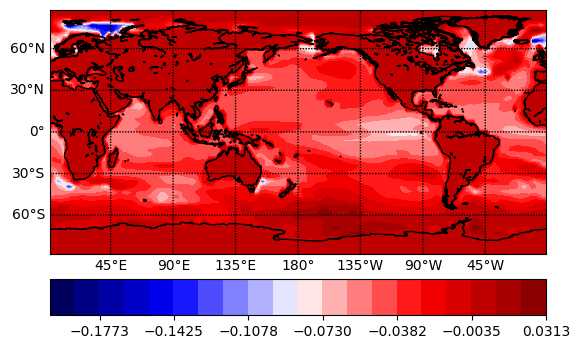

<Figure size 640x480 with 0 Axes>

In [7]:
plot_map(lon_sst,lat_sst,X_train.mean(0),'file.png')

/tmp/ipykernel_2491872/626566158.py:8: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver =Eof(X_train[:1428],weights=wgts)


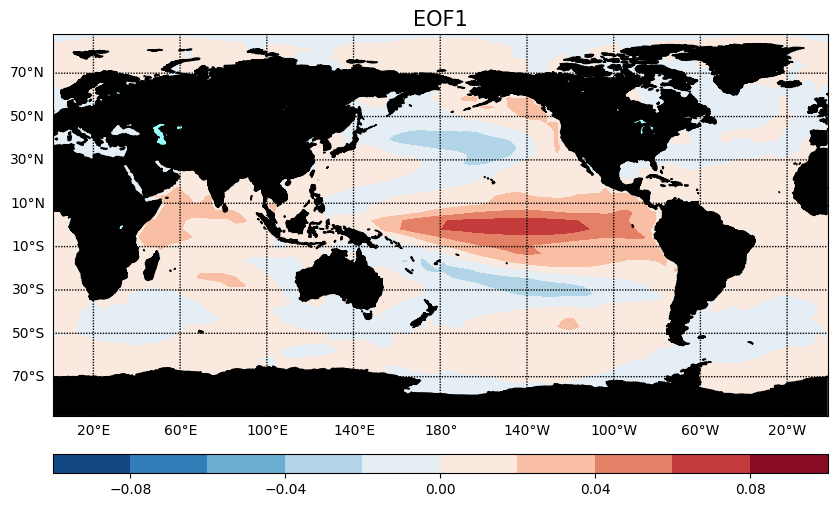

In [8]:
from eofs.standard import Eof
wgts   = np.cos(np.deg2rad(lat_sst))
wgts   = wgts.reshape(len(wgts), 1)
#solver1 = Eof(np.array(ser_original[6]), weights=wgts)

coslat = np.cos(np.deg2rad(lat_sst))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver =Eof(X_train[:1428],weights=wgts)
eof1=solver.eofs()

pc=solver.pcs(pcscaling=1)
varfrac=solver.varianceFraction()
lambdas=solver.eigenvalues()


parallels = np.arange(-90,90,20)
meridians = np.arange(-180,180,40)

fig=plt.figure(figsize=(10,16)) 

m=Basemap(projection='cyl', llcrnrlon=min(lon_sst), llcrnrlat=min(lat_sst),
          urcrnrlon=max(lon_sst), urcrnrlat=max(lat_sst), resolution='l')
x, y = m(*np.meshgrid(lon_sst,lat_sst))
clevs = np.linspace(-0.1,0.1,11)

cs = m.contourf(x,y,eof1[0,:,:].squeeze(),clevs,cmap=plt.cm.RdBu_r)
m.drawcoastlines()
m.fillcontinents(color='#000000',lake_color='#99ffff')
m.drawparallels(parallels,labels=[1,0,0,0])
m.drawmeridians(meridians,labels=[1,0,0,1])

cb=m.colorbar(cs, 'bottom', size='5%',pad='10%')
#cb.set_label('EOF', fontsize=10)
plt.title('EOF1', fontsize=15)  
plt.show()